Import the Dpendencies

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and analysis

In [49]:
# loading the data from csv file to a pandas dataframe
customer_data = pd.read_csv('customer data.csv')

In [50]:
# first five rowa in the dataframe
customer_data.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,34,97,81
1,2,50,120,22
2,3,23,65,56
3,4,41,110,43
4,5,29,78,89


In [51]:
# finding the number of rows and columns
customer_data.shape

(300, 4)

In [52]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              300 non-null    int64
 1   Age                     300 non-null    int64
 2   Annual Income (k$)      300 non-null    int64
 3   Spending Score (1-100)  300 non-null    int64
dtypes: int64(4)
memory usage: 9.5 KB


In [53]:
# checking for missing values
customer_data.isnull().sum()

,0
CustomerID,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


chossing the annual income and spending score column

In [54]:
X = customer_data.iloc[:,[2,3]].values

In [55]:
print(X)

[[ 97  81]
 [120  22]
 [ 65  56]
 [110  43]
 [ 78  89]
 [133  31]
 [ 54  77]
 [ 89  65]
 [140  49]
 [ 45  23]
 [134  90]
 [101  38]
 [122  64]
 [ 85  76]
 [145  58]
 [ 68  42]
 [ 96  73]
 [111  29]
 [ 72  87]
 [127  55]
 [ 57  40]
 [139  88]
 [ 66  53]
 [119  61]
 [109  75]
 [132  34]
 [ 80  84]
 [ 70  46]
 [124  68]
 [ 93  51]
 [147  78]
 [ 52  27]
 [107  63]
 [ 90  85]
 [135  39]
 [100  44]
 [142  71]
 [ 81  59]
 [116  33]
 [ 88  79]
 [130  47]
 [ 74  66]
 [138  25]
 [ 95  82]
 [121  54]
 [ 84  91]
 [137  36]
 [112  69]
 [ 77  60]
 [126  50]
 [ 69  72]
 [117  41]
 [105  83]
 [ 92  67]
 [125  35]
 [ 86  80]
 [141  48]
 [108  62]
 [ 73  90]
 [123  37]
 [ 79  55]
 [114  70]
 [ 91  39]
 [132  65]
 [ 82  86]
 [138  45]
 [ 98  57]
 [120  74]
 [ 87  28]
 [136  61]
 [ 76  92]
 [ 99  46]
 [113  63]
 [143  30]
 [ 84  77]
 [131  54]
 [ 94  68]
 [128  42]
 [106  71]
 [ 75  89]
 [139  53]
 [115  40]
 [ 88  85]
 [146  32]
 [102  59]
 [118  26]
 [ 83  93]
 [129  44]
 [100  70]
 [144  36]
 [110  62]

choosing the number of clusters

finding correct no. of clusters
WCSS -> Within clusters sum of squares

In [56]:
# finding WCSS value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

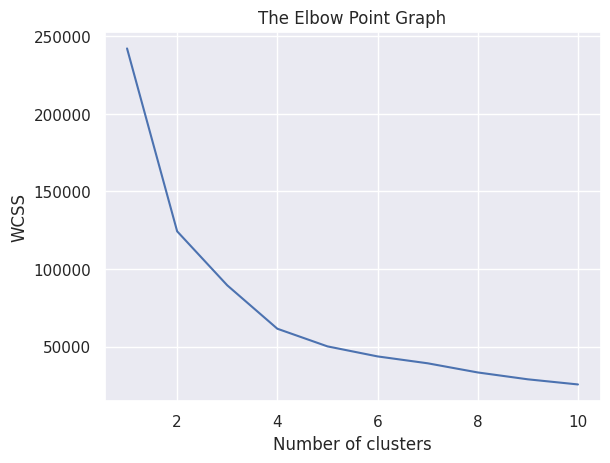

In [57]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of clusters = 4 (an elbow at 2 and 4 in thr graph above, so we take elbow point 4)

Training the k-Means clustering Model

In [58]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[1 0 2 2 1 0 1 1 0 2 3 2 3 1 0 2 1 2 1 0 2 3 2 3 3 0 1 2 3 2 3 2 3 1 0 2 3
 2 0 1 0 1 0 1 0 1 0 3 2 0 1 0 1 1 0 1 0 3 1 0 2 3 2 3 1 0 2 3 2 3 1 2 3 0
 1 0 1 0 3 1 0 0 1 0 2 0 1 0 1 0 3 1 0 2 1 0 3 2 3 2 3 2 0 3 2 0 1 0 3 2 3
 2 3 2 1 0 1 0 2 3 1 0 3 1 0 1 0 3 1 0 2 1 0 3 1 0 2 3 2 0 3 2 0 1 0 3 1 0
 3 0 1 0 2 3 2 3 2 0 1 0 1 0 3 1 0 3 0 1 0 3 1 0 1 0 1 3 2 3 2 1 0 3 2 3 1
 0 1 0 3 0 1 0 1 0 2 3 1 0 1 0 3 0 2 0 1 0 3 2 3 2 3 2 0 3 2 3 2 3 2 3 2 0
 1 0 0 1 0 3 2 3 3 2 3 2 3 2 0 3 1 0 3 1 0 3 1 0 3 0 3 2 3 1 0 3 0 1 0 1 0
 3 2 3 0 1 0 1 0 2 3 2 1 0 1 3 0 3 1 0 3 1 0 1 0 3 0 1 0 2 3 2 3 2 0 3 2 0
 3 1 0 3]


Visualizing al the clusters

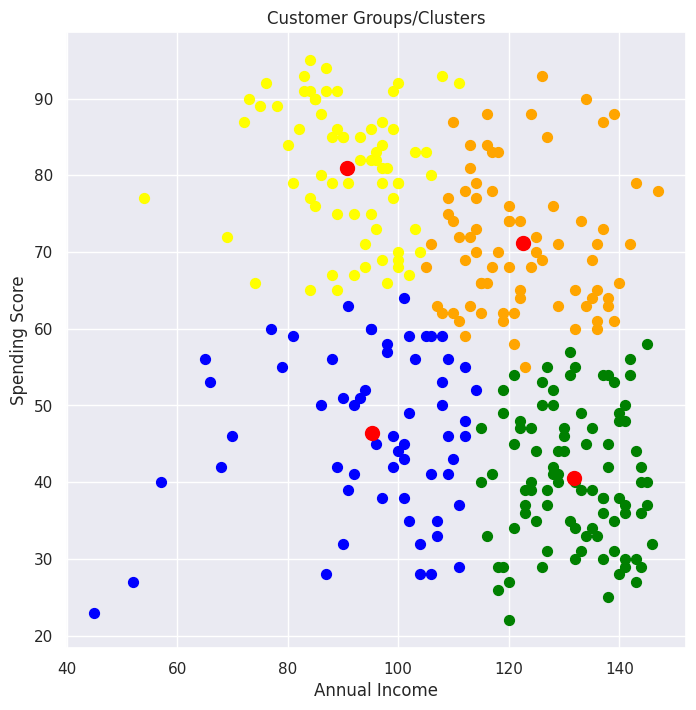

In [59]:
# ploting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1') #[Y==0,0]->0 is cluster number and 0 is first column(annual income), [Y==0,1]->0 is cluster number and 1 is second column(spending score)
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='yellow', label='Cluster 2') # s is the size of the dot.
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='orange', label='Cluster 4')

# we plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', label='Centroids')

plt.title('Customer Groups/Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()